# Let's learn a bit more about importing

One of the key ways you can immediately make your code more professional looking is by using modules to import the functions and classes you'll need. As an example, let's imagine we wanted to import a module we wrote that measures metrics about linear regression. The file is called `regression_metrics.py`. Note that the `*.py` style naming is not optional unless you want to get way more complicated. For now, just know that if you're writing a module for Python, you want to call it `*something*.py`.

To get started, let's tell matplotlib to use the notebook as output. Notice that we're not importing matplotlib here! We're going to let it be imported in the module where the plotting code is. That has some complications which we'll explore in a bit. 

In [ ]:
%matplotlib inline

Okay, we're ready to bring in our module. To do so, we can just ask python to import the file (by name, minus the .py). This is going to make all the stuff in that file available to us, but it will belong to that import name. Let's see what I mean.

In [2]:
import regression_metrics as met

In [3]:
met.__dir__()

['__name__',
 '__doc__',
 '__package__',
 '__loader__',
 '__spec__',
 '__file__',
 '__cached__',
 '__builtins__',
 'stats',
 'np',
 'plt',
 'mean_squared_error',
 'root_mean_square_error',
 'mean_absolute_error',
 'sum_squared_error',
 'r2_score',
 'adj_r2',
 'standard_error_estimate',
 'plot_model_results',
 'p_vals_per_coef',
 'model_score']

So all of the functions I wrote, like `model_score`, are now hanging out under the name of `met`. So if I wanted to call model score, I'd need to say `met.model_score(...)`. Also notice that we've got numpy in there as np. So let's try to run some code. 

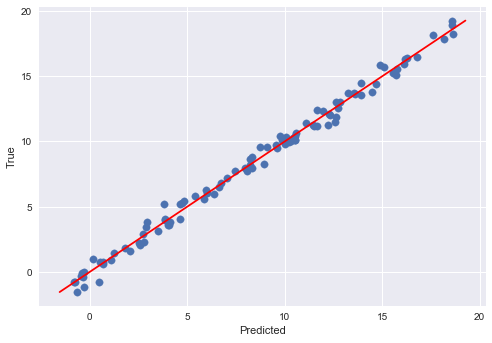

Mean Squared Error:  0.2208348843158485
Root Mean Squared Error:  0.4699307228899261
Mean Absolute Error:  0.37819726516986824
R2:  0.9927090716426484
Adj R2:  0.9926346744145121
Standard Error of Estimate:  0.4747017154905187


In [10]:
from sklearn.linear_model import LinearRegression

X = np.random.uniform(-10,10,100)
y = X + np.random.normal(0,0.5, 100) + 9
X = X.reshape(-1,1)

lr = LinearRegression()
lr.fit(X, y)
preds = lr.predict(X)

_ = met.model_score(y, preds, X, verbose = 1)


Whoa... why did it break? I already imported numpy!? Kind of. I did, but numpy is currently called `met.np` not just np. If I want to use numpy I have two options, either import it like normal, or tell python that I want the variable `np` to point to `met.np` so that everyone's sharing numpy together.

In [11]:
from sklearn.linear_model import LinearRegression
np = met.np

X = np.random.uniform(-10,10,100)
y = X + np.random.normal(0,0.5, 100) + 9
X = X.reshape(-1,1)

lr = LinearRegression()
lr.fit(X, y)
preds = lr.predict(X)

Cool. We got the data and the model working. Now let's try to see the `model_score` function in action.

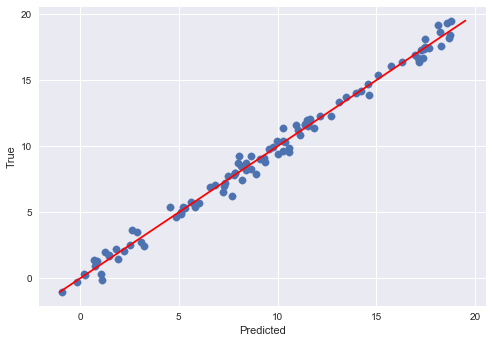

Mean Squared Error:  0.26170809891870117
Root Mean Squared Error:  0.5115741382426414
Mean Absolute Error:  0.4002110399619345
R2:  0.9914462342973184
Adj R2:  0.9913589509738217
Standard Error of Estimate:  0.5167679174729086


(0.9914462342973184, 0.9913589509738217)

In [12]:
model_score(y, preds, X, verbose = 1)

Remember, we have to tell it where model score lives. Right now it lives under `met`'s house

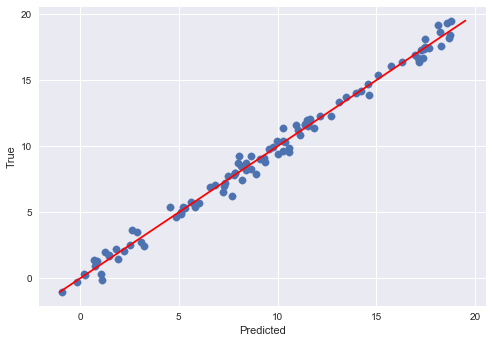

Mean Squared Error:  0.26170809891870117
Root Mean Squared Error:  0.5115741382426414
Mean Absolute Error:  0.4002110399619345
R2:  0.9914462342973184
Adj R2:  0.9913589509738217
Standard Error of Estimate:  0.5167679174729086


In [13]:
_ = met.model_score(y,preds,X,verbose=1) 
# The "_ =" is just telling Python to call whatever comes back from that 
# function '_', which is the convention for, "I don't care about what comes back"

In [14]:
met.p_vals_per_coef(preds, y, lr.coef_, X)

array([[0.]])

Let's look at the code for regression metrics. 

> Note: Jupyter has a magic command if you type `%load filename` it will put the text/code from `filename` into the cell for you

**Note, don't run the cell below, it will work but breaks a demo later on**

In [ ]:
# %load regression_metrics.py
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(true, pred):
    return np.mean((pred - true)**2)

def root_mean_square_error(true,pred):
    return np.sqrt(mean_squared_error(true,pred))

def mean_absolute_error(true,pred):
    return np.mean(np.abs(pred - true))

def sum_squared_error(true,pred):
    return np.sum((pred - true)**2)

def r2_score(true,pred):
    y_bar = np.mean(true)
    SSE = np.sum((pred - true)**2)
    SST = np.sum((true - y_bar)**2)
    return 1.-(SSE/SST)

def adj_r2(rsquare, num_data, num_features):
    temp = (1-rsquare)*(num_data-1)
    temp = temp/(num_data-num_features-1)
    temp = 1 - temp
    return temp

def standard_error_estimate(true,pred,num_data):
    SSE = np.sum((pred - true)**2)
    return np.sqrt(SSE/(num_data-2))

def plot_model_results(X,y,ypred):
    plt.style.use('seaborn')
    plt.scatter(ypred,y,s=55)
    plt.plot([min(y),max(y)],[min(y),max(y)],'r-')
    plt.xlabel('Predicted')
    plt.ylabel('True');
    plt.show()
    
def p_vals_per_coef(pred, true, coefs, X):
    sse =  sum_squared_error(pred,true)/ float(X.shape[0] - X.shape[1])
    standard_error = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
    t_stats = coefs / standard_error
    p_vals = 2 * (1 - stats.t.cdf(np.abs(t_stats), true.shape[0] - X.shape[1]))
    return p_vals

def model_score(true, pred, X, verbose=0):
    r2 = r2_score(true,pred)
    adjr2 = adj_r2(r2,X.shape[0],X.shape[1])
    if verbose:
        plot_model_results(X,true,pred)
        print("Mean Squared Error: ", mean_squared_error(true,pred))
        print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(true,pred)))
        print("Mean Absolute Error: ",mean_absolute_error(true,pred))
        print("R2: ", r2)
        print("Adj R2: ", adjr2)
        print("Standard Error of Estimate: ", standard_error_estimate(true,pred,X.shape[0]))
    return r2, adjr2


if __name__ == '__main__':

    from sklearn.linear_model import LinearRegression

    X = np.random.uniform(-10,10,100)
    y = X + np.random.normal(0,0.5, 100) + 9
    X = X.reshape(-1,1)

    lr = LinearRegression()
    lr.fit(X, y)
    preds = lr.predict(X)

    _ = model_score(y, preds, X, verbose = 1)


When I did the import... none of the stuff at the bottom ran, despite not being wrapped in a function name. Why? It turns out that when you run a python program, there's a hidden variable called `__name__`. If I run a program directly, it's `__name__` is set to `__main__`. If I import a file, it's name is not `__main__`. So by tucking that code into the `if __name__ == '__main__'` block, I made sure that code only runs if someone called, `python regression_metrics.py`. 

### What if I don't want to use namespaces (the whole `met.function_name` thing)

If I don't want my functions to live underneath the name of who they belong to, then I can ask to bring them in outside of the name space by explicity getting them "from" the file where they live.

In [15]:
from regression_metrics import model_score

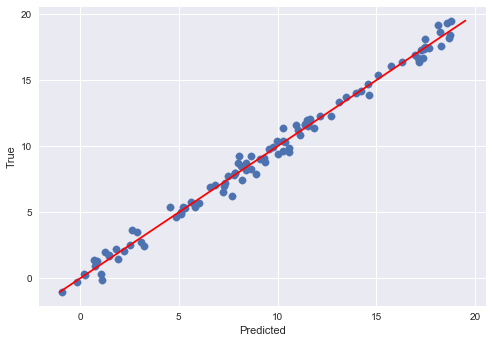

Mean Squared Error:  0.26170809891870117
Root Mean Squared Error:  0.5115741382426414
Mean Absolute Error:  0.4002110399619345
R2:  0.9914462342973184
Adj R2:  0.9913589509738217
Standard Error of Estimate:  0.5167679174729086


(0.9914462342973184, 0.9913589509738217)

In [16]:
model_score(y, preds, X, verbose=1)

If I wanted them all to be available

In [17]:
def mean_squared_error(x,y):
    print("I'M MEAN SQUARED ERROR")

In [18]:
mean_squared_error(y, preds)

I'M MEAN SQUARED ERROR


In [19]:
from regression_metrics import *

In [20]:
mean_squared_error(y, preds)

0.26170809891870117

# So what does this all mean?

At the end of the day, Jupyter notebooks are unacceptable for production. They just don't work. So you'll need to be able to put your code into module form. There are two options for that: 

>1) Write some big, awful single python file that contains everything in your notebook and makes everyone who ever sees it weep.
>
>2) Make lots of small files that contain all the functions/classes to do a specific thing

Let's show an example of 2. Let's look at an example directory for a project.

```
project_name
|
|--- README.md
|--- project_name.py # the main file that runs things
|--- src # all the files you want to import from
    |
    |--- web_scraping.py
    |--- regression_metrics.py
    |--- linear_regression_helpers.py
    |--- plotting_methods.py
    |--- data_cleaning.py
|--- Notebooks
    |
    |--- data_scraping_prototype.py
    |--- data_cleaning_prototype.py
    |--- visualization_prototype.py
    |--- eda.py
```
    
If this were a real project, I'd be providing a single python file that the user is supposed to run to do the things. It would have only code that is specific to reading from the user/sending things to the user and managing the processes. All of the functions and classes would live inside the `src` folder.

The reason for this is twofold:

>1) It's easy to maintain code when all the related functions are in the same file. It's also easier to track down errors.
>
>2) If something needs to be updated or "swapped out", I just change it in the file that's being imported from, without changing the main code - which risks breaking everything. 

# Okay, but we always imported from the same directory... how would I import from another directory?

In [21]:
import regression_metrics_in_src

ModuleNotFoundError: No module named 'regression_metrics_in_src'

In [22]:
import sys

In [23]:
sys.path.append("./src")

In [24]:
import regression_metrics_in_src as rmis

In [25]:
rmis.mean_squared_error(preds, y)

0.26170809891870117

In [26]:
sys.path

['/Users/rudywang/Documents/GitHub/dsp/lessons/python_intro/importing_with_python',
 '/Users/rudywang/opt/anaconda3/lib/python37.zip',
 '/Users/rudywang/opt/anaconda3/lib/python3.7',
 '/Users/rudywang/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/Users/rudywang/opt/anaconda3/lib/python3.7/site-packages',
 '/Users/rudywang/opt/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Users/rudywang/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/rudywang/.ipython',
 './src']